## Step 1: Testing YOLO v11 of detecting and tracking pedestrain

In [7]:
import numpy as np
import pandas as pd

In [1]:
from ccai9012 import yolo_utils

In [2]:
# Load the local YOLOv11 model 
from ultralytics import YOLO
model = YOLO("yolo11m.pt")

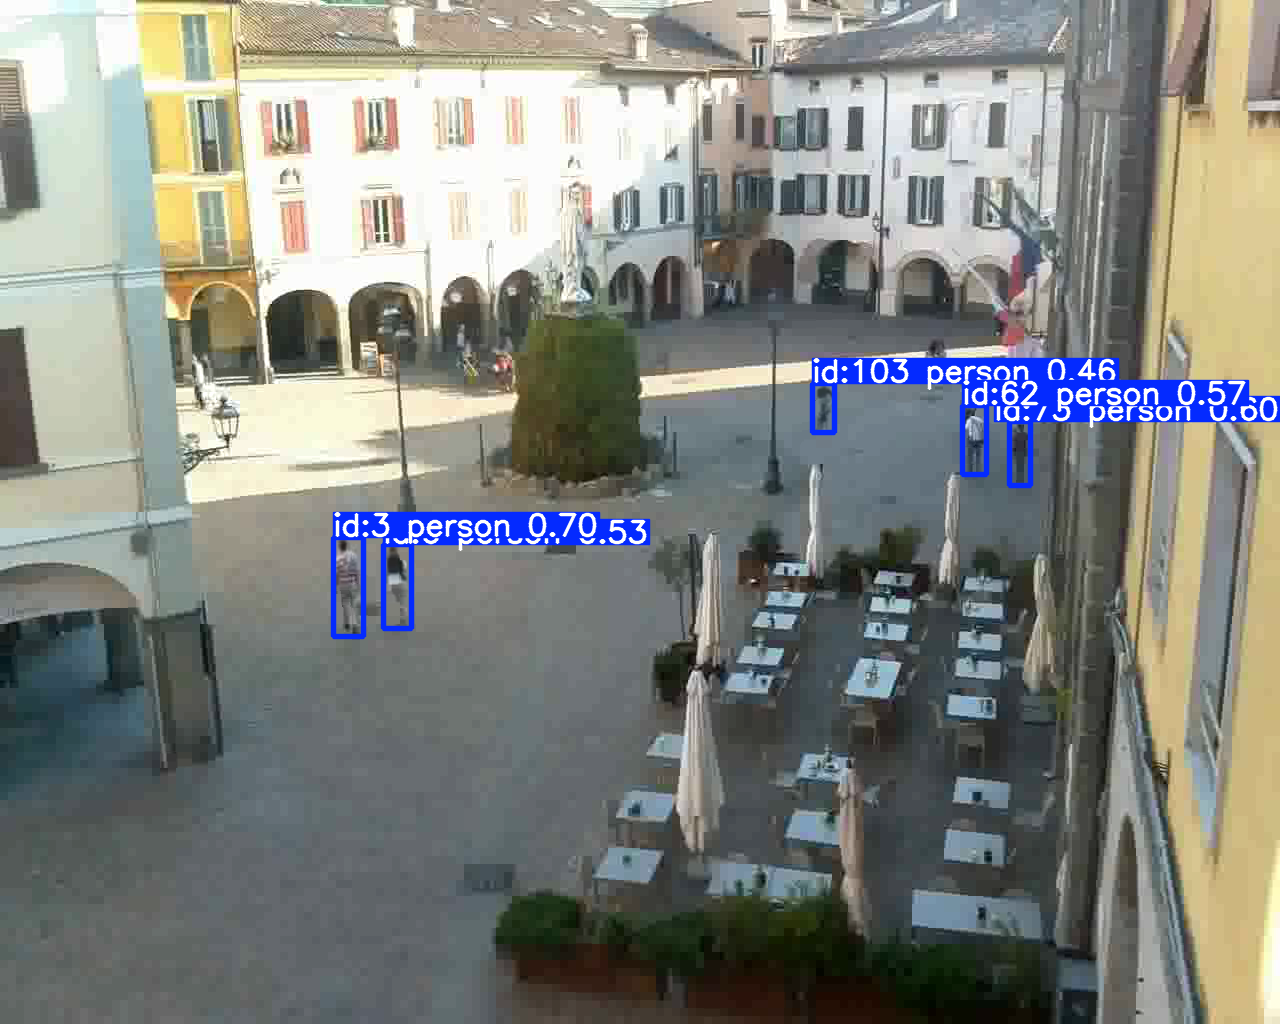

Tracking complete. Results saved to output


frame   id           x1          y1           x2           y2
0         0    1    86.935654  769.614319   132.187576   884.825500
1         0    2    51.777321  769.004272    91.232918   893.318726
2         0    3   352.970581  979.043640   402.730591  1023.480286
3         0    4   615.638855  534.641785   638.167664   609.842102
4         0    5   687.771790  353.340729   710.674377   411.254913
...     ...  ...          ...         ...          ...          ...
1495    224    3   333.170502  537.861389   363.679657   636.641541
1496    224   62   962.238708  405.511932   986.328308   474.298676
1497    224    6   383.211975  544.037048   411.395325   628.114502
1498    224   73  1009.487793  421.310425  1030.828003   485.283630
1499    224  103   812.981079  383.609039   834.230896   432.228333

[1500 rows x 6 columns]

In [5]:
video_dir = "video/nuclear_test_15.mp4"
output_dir = "output"
yolo_utils.detect_and_track(video_dir, model, output_dir)

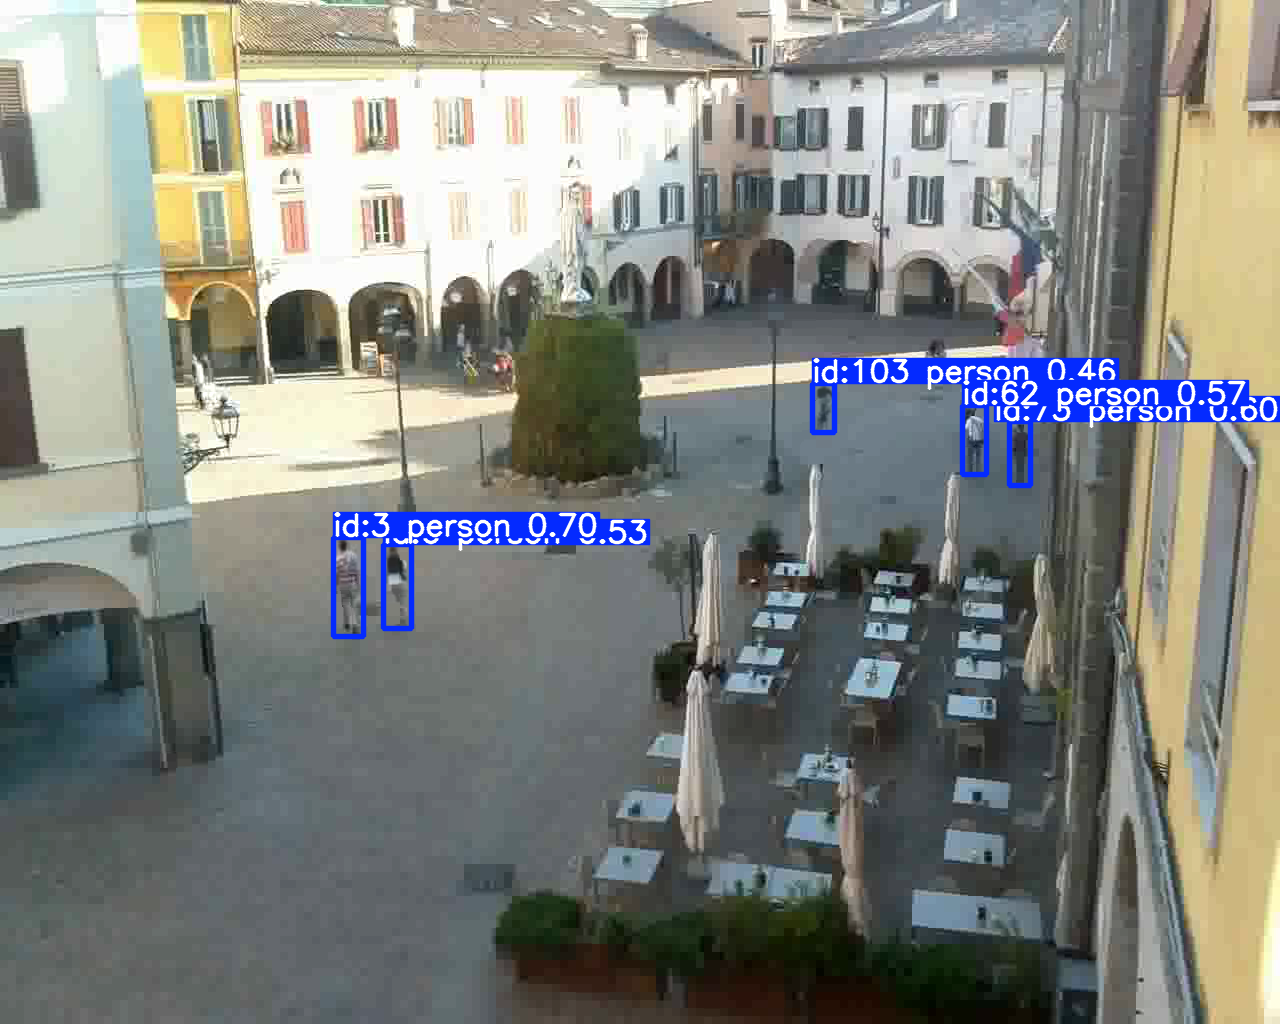

Tracking complete. Outputs saved


In [4]:
video_dir = "video/nuclear_test_15.mp4"
output_dir = "output"
detect_track(video_dir, output_dir)

In [8]:
# CSV Output Explanation:
# The CSV file 'yolo_track_results.csv' contains one row per detected object per frame.
# Each row includes the following columns:
#
# - frame:        The index of the video frame where the detection occurred (0-based).
# - id:           The tracking ID assigned by ByteTrack.
#                 Objects with the same ID across frames are considered the same tracked person.
#                 An ID of -1 indicates that no stable tracking ID was assigned (e.g., early frames or low confidence).
# - x1, y1:       The coordinates of the top-left corner of the bounding box (in pixels).
# - x2, y2:       The coordinates of the bottom-right corner of the bounding box (in pixels).
#
# These coordinates are relative to the resolution of the original input frame.

df_test = pd.read_csv("output/nuclear_test_15_results.csv")
df_test

frame   id           x1          y1           x2           y2
0         0    1    86.935654  769.614319   132.187576   884.825500
1         0    2    51.777321  769.004272    91.232918   893.318726
2         0    3   352.970581  979.043640   402.730591  1023.480286
3         0    4   615.638855  534.641785   638.167664   609.842102
4         0    5   687.771790  353.340729   710.674377   411.254913
...     ...  ...          ...         ...          ...          ...
1495    224    3   333.170502  537.861389   363.679657   636.641541
1496    224   62   962.238708  405.511932   986.328308   474.298676
1497    224    6   383.211975  544.037048   411.395325   628.114502
1498    224   73  1009.487793  421.310425  1030.828003   485.283630
1499    224  103   812.981079  383.609039   834.230896   432.228333

[1500 rows x 6 columns]

## Step 2: Read a webcam video and clip

In [9]:
from moviepy import VideoFileClip

In [7]:
# clip the original video to save computating time
clip = VideoFileClip('video/Live Cam Iseo _ SkylineWebcams _(9_30_16_55).mp4').subclipped(0, 300)
clip.write_videofile('video/cam_iseo.mp4', fps = 1, codec='mpeg4', audio = False)

MoviePy - Building video video/cam_iseo.mp4.
MoviePy - Writing video video/cam_iseo.mp4



MoviePy - Done !
MoviePy - video ready video/cam_iseo.mp4


## Step 3: Run YOLO to detect and track pedestrian in the clip and save the results

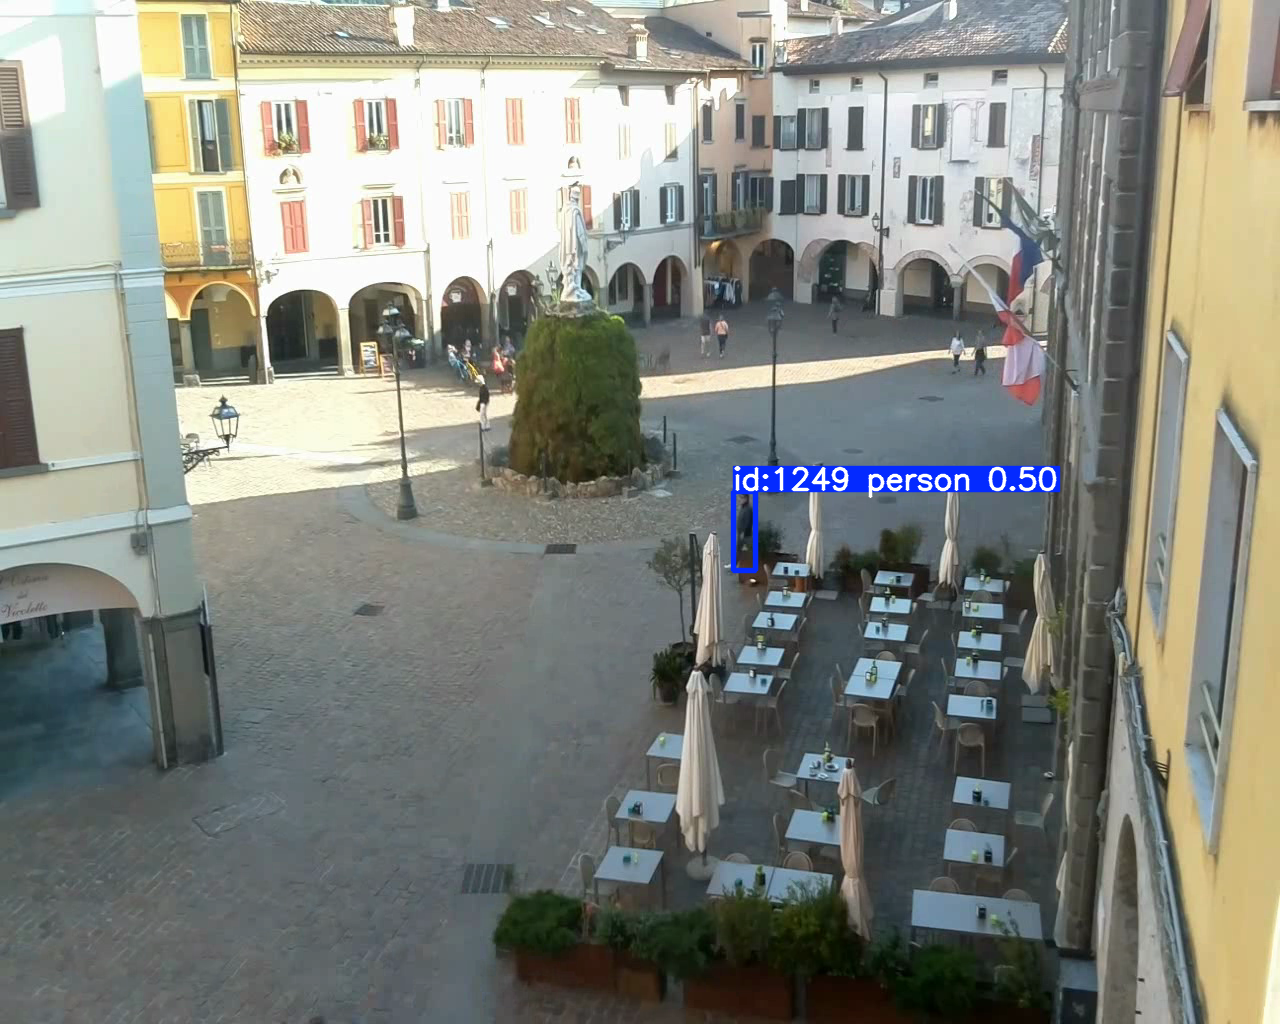

Tracking complete. Results saved to output


frame    id          x1          y1          x2           y2
0         0    -1    0.247059  737.487671   43.435390   835.077026
1         0    -1  430.090942  382.597656  464.279907   442.097656
2         0    -1  845.235352  733.964355  880.822510   811.316406
3         0    -1  758.021851  719.687988  791.000000   785.091309
4         0    -1  460.839844  334.773193  474.503418   373.604492
...     ...   ...         ...         ...         ...          ...
1192    297  1349  234.662033  928.803772  281.026459  1024.000000
1193    297  1351  423.849976  917.792664  467.165771  1024.000000
1194    298  1266  318.136444  949.975830  355.981537  1024.000000
1195    298  1351  422.838165  968.054932  450.656738  1024.000000
1196    299  1249  733.319580  491.569061  755.585266   570.173584

[1197 rows x 6 columns]

In [11]:
video_dir = "video/cam_iseo.mp4"
output_dir = "output"
yolo_utils.detect_and_track(video_dir, model, output_dir)

## Step 4: Visualize pedestrian footprint heatmap and trajectories

In [12]:
# Load CSV
df = pd.read_csv('output/cam_iseo_results.csv')

# Calculate bottom center point of each bounding box
df['x_center'] = (df['x1'] + df['x2']) / 2
df['y_bottom'] = df['y2']  # Use bottom edge for vertical coordinate

In [14]:
# save a frame from the video as background
import cv2

video_path = "video/cam_iseo.mp4"
frame_number = 100  # any frame
background_img_path = "output/bg_frame.jpg"

cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = cap.read()
cap.release()

if ret:
    cv2.imwrite(background_img_path, frame)

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

# Load CSV and calculate bottom center point
df = pd.read_csv('output/cam_iseo_results.csv')
df['x_center'] = (df['x1'] + df['x2']) / 2
df['y_bottom'] = df['y2']

# Load background image
bg_img = mpimg.imread("output/viz/bg_frame.jpg")
height, width = bg_img.shape[:2]

/opt/anaconda3/envs/huggingface/lib/python3.13/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


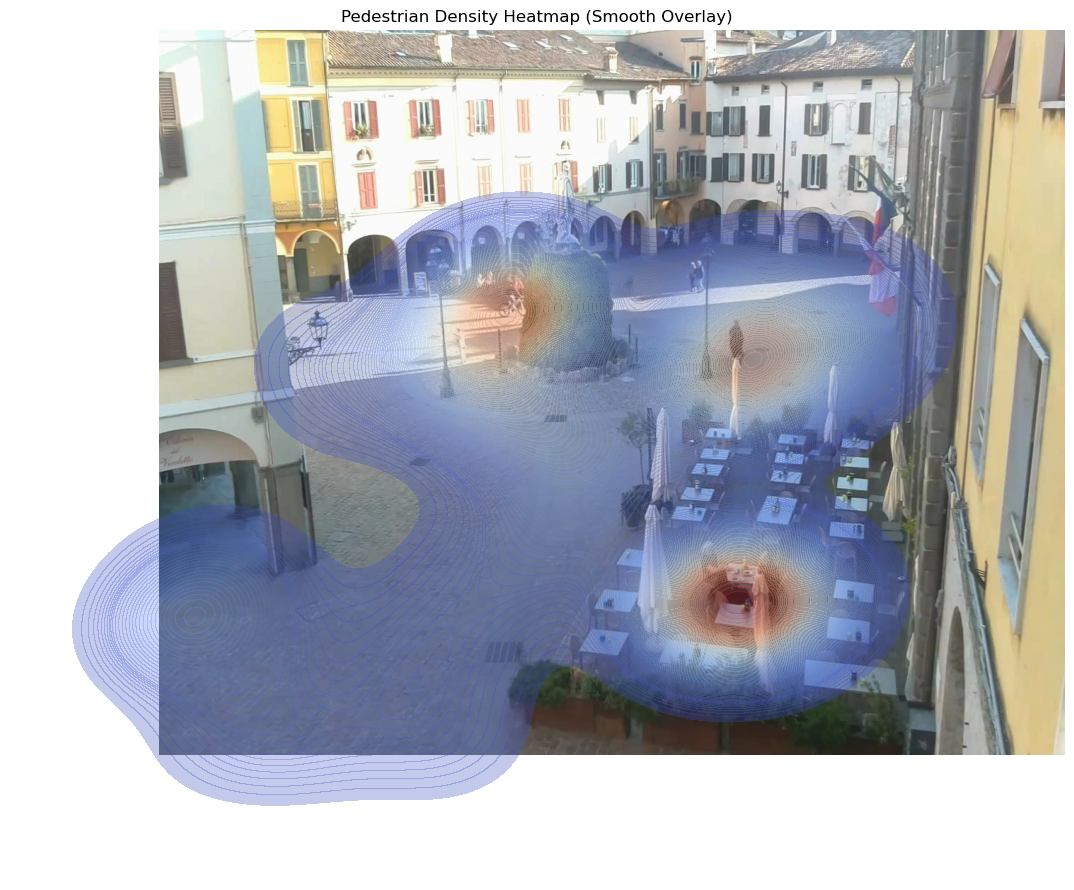

In [16]:
# Visualize pedestrian footprint heatmap

plt.figure(figsize=(12, 9))

# Show background image with transparency
plt.imshow(bg_img, extent=[0, width, height, 0], alpha=0.9)

# KDE heatmap with smooth blending and no white contour lines
sns.kdeplot(
    x=df['x_center'],
    y=df['y_bottom'],
    fill=True,              # fill area under KDE
    cmap="coolwarm",            # smooth color map
    bw_adjust=1.0,          # bandwidth
    levels=100,             # more levels = smoother gradient
    alpha=0.3,              # transparency of the heatmap
    thresh=0.02,            # remove low-density noise
    linewidths=0            # no contour lines (white borders)
)

plt.title("Pedestrian Density Heatmap (Smooth Overlay)")
plt.axis('off')
plt.tight_layout()
plt.savefig("output/viz/heatmap_overlay.png", dpi=300)
plt.show()

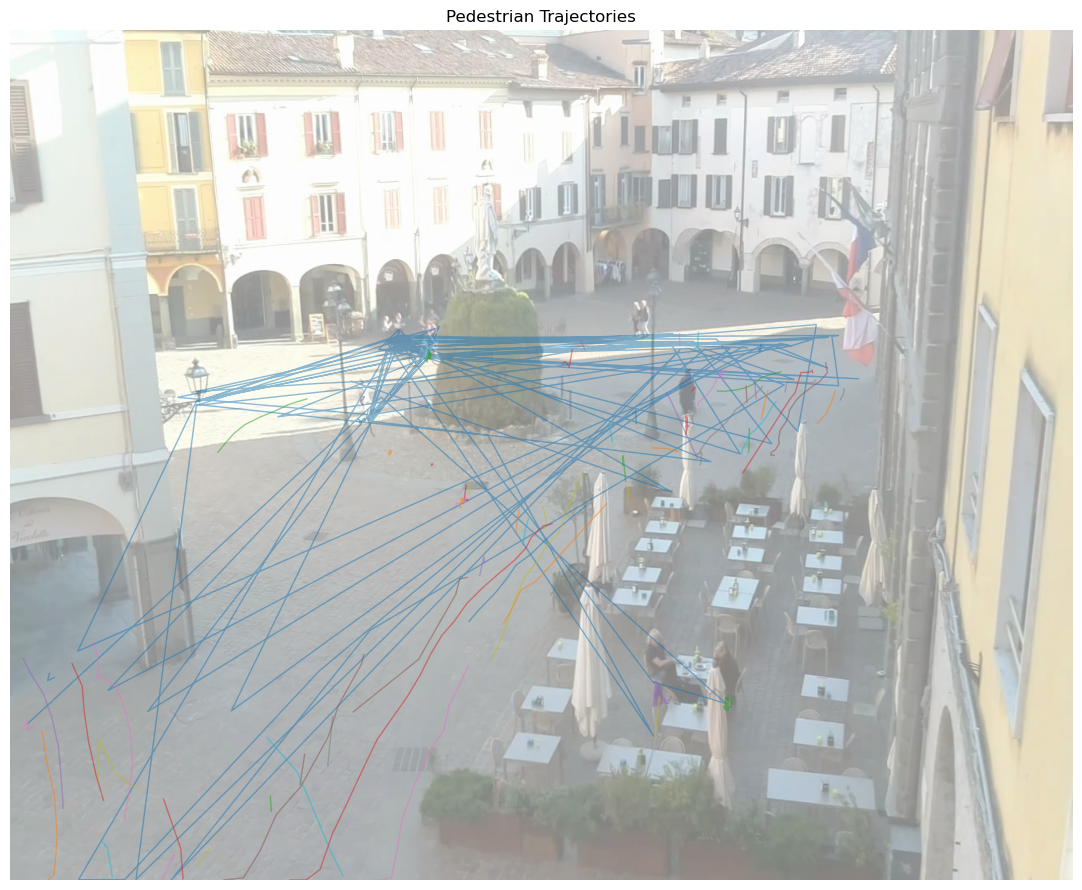

In [17]:
# Pedestrian Trajectories
plt.figure(figsize=(12, 9))

# Show background image
plt.imshow(bg_img, extent=[0, width, height, 0], alpha=0.5)

# Draw each trajectory
for pid, group in df.groupby("id"):
    plt.plot(group['x_center'], group['y_bottom'], linewidth=1, alpha=0.5)

plt.title("Pedestrian Trajectories")
plt.axis('off')
plt.tight_layout()
plt.savefig("output/viz/trajectory_overlay.png", dpi=300)
plt.show()

## Step 5: Generate a visualizing clip

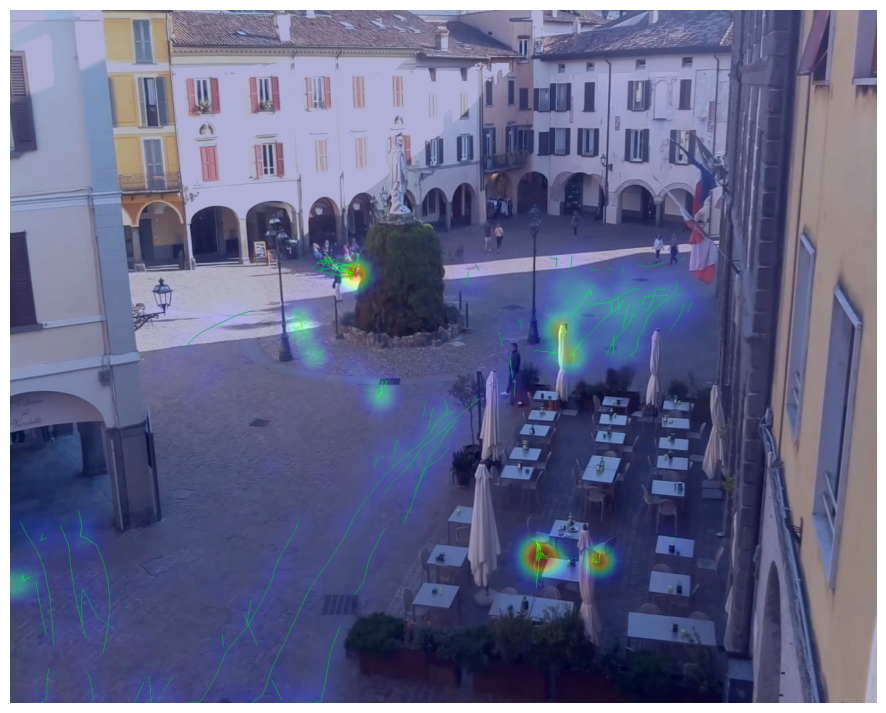

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

In [18]:
yolo_utils.visualize_video(
    input_csv='output/cam_iseo_results.csv',
    input_video='video/cam_iseo.mp4',
    output_video='output/viz/cam_iseo_viz.mp4',
    show_window=True
)